 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1009]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [1010]:
# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")
# YOUR CODE HERE
whale_returns = pd.read_csv(whale_returns_csv,index_col="Date",parse_dates=True,infer_datetime_format=True)

In [1011]:
# Count nulls
# YOUR CODE HERE
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [1012]:
# Drop nulls
# YOUR CODE HERE
whale_returns.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [1013]:
# Reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")
# YOUR CODE HERE
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date",parse_dates=True,infer_datetime_format=True)

In [1014]:
# Count nulls
# YOUR CODE HERE
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [1015]:
# Drop nulls
# YOUR CODE HERE
algo_returns.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [1016]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("sp500_history.csv")
# YOUR CODE HERE
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date",parse_dates=True,infer_datetime_format=True)


In [1017]:
sp500_history

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [1018]:
# Check Data Types
# YOUR CODE HERE
sp500_history.dtypes


Close    object
dtype: object

In [1019]:
# Fix Data Types
# YOUR CODE HERE
sp500_history_fl = sp500_history.replace({'\$': '', ',': ''}, regex=True).astype(float)

In [1020]:
sp500_history_fl


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [1021]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_daily_returns = sp500_history_fl.pct_change()


In [1022]:
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [1023]:
# Drop nulls
# YOUR CODE HERE
sp500_daily_returns = sp500_daily_returns.dropna()

In [1024]:
sp500_daily_returns

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [1025]:
# Rename Column
# YOUR CODE HERE
sp500_daily_returns_df = sp500_daily_returns.rename(columns={"Close":"SP 500" })


In [1026]:
sp500_daily_returns_df

,SP 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [1027]:
whale_returns_df = pd.DataFrame(whale_returns)
whale_returns_df = whale_returns_df.dropna()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [1028]:
algo_returns_df = pd.DataFrame(algo_returns)
algo_returns_df = algo_returns_df.dropna()
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [1029]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
dataframe_list =[whale_returns_df,algo_returns_df,sp500_daily_returns_df]
combined_df = pd.concat(dataframe_list,sort=True,axis =1, join="inner")

---

In [1030]:
combined_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP 500                         0
dtype: int64

In [1031]:
combined_df.head(50)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.012445
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.006112
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.013353


# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

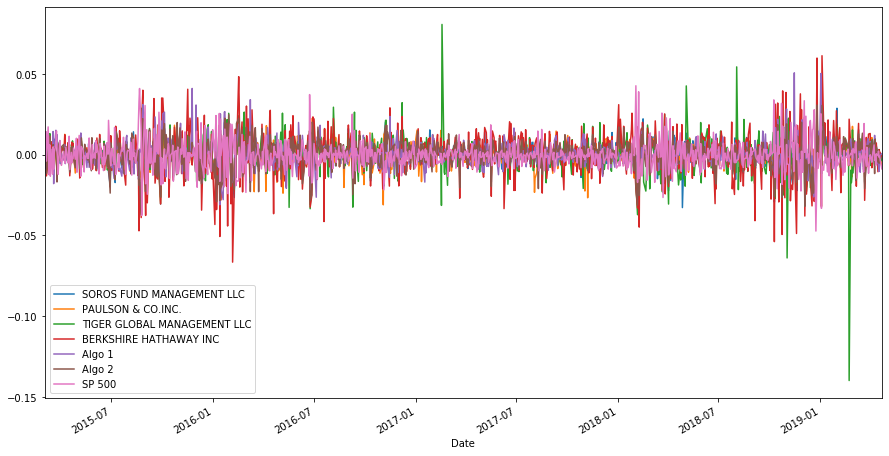

In [1032]:
# Plot daily returns
# YOUR CODE HERE
combined_df.plot(figsize=(15,8))

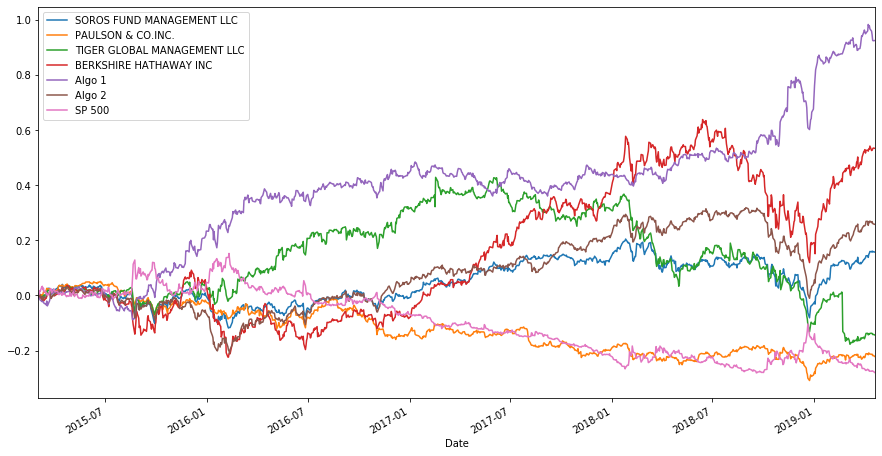

In [1033]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns.plot(figsize=(15,8))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

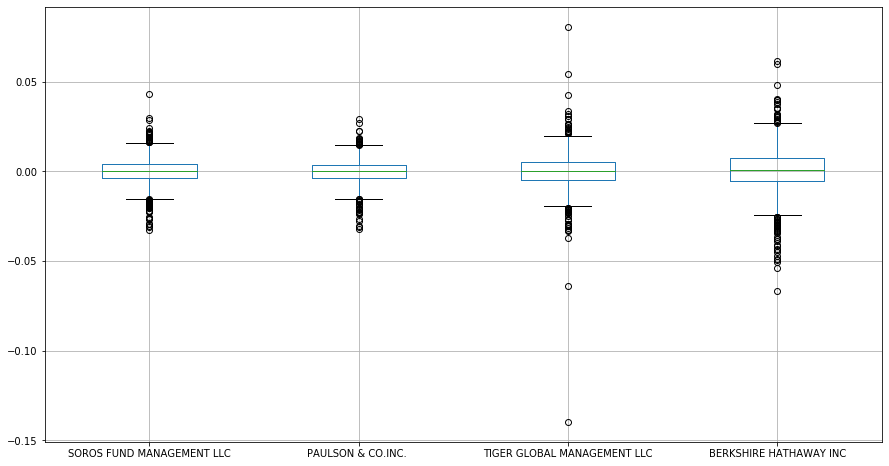

In [1034]:
# Box plot to visually show risk
# YOUR CODE HERE whale_returns_df,algo_returns_df,sp500_daily_returns_df

whale_returns_df.boxplot(figsize=(15,8))

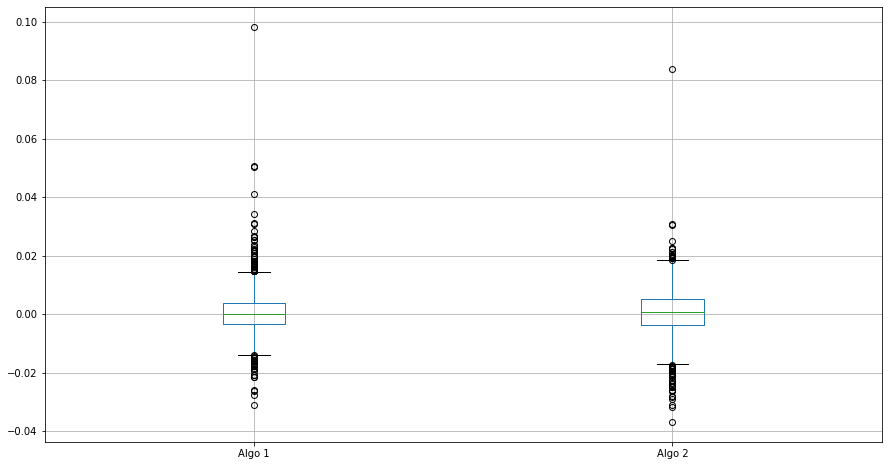

In [1035]:
algo_returns_df.boxplot(figsize=(15,8))

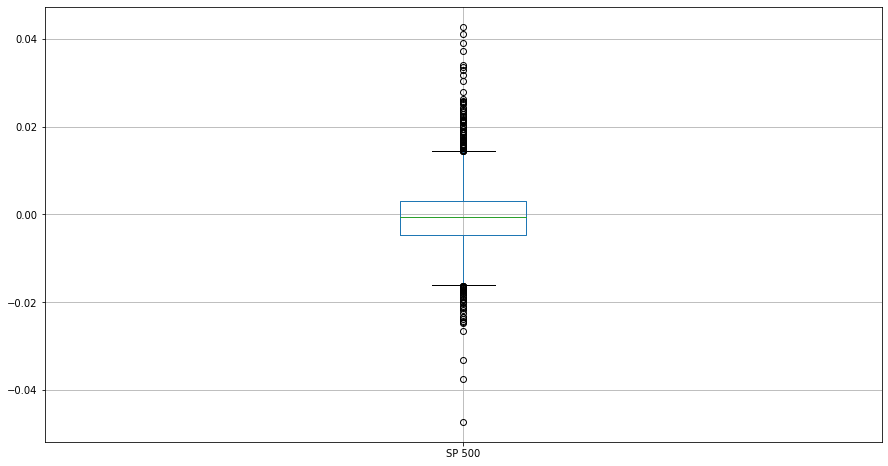

In [1036]:
sp500_daily_returns_df.boxplot(figsize=(15,8))

In [1037]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
whale_daily_std = whale_returns_df.std()
whale_daily_std

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [1038]:
algo_daily_std = algo_returns_df.std()
algo_daily_std

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [1039]:
sp500_daily_std = sp500_daily_returns_df.std()
sp500_daily_std

SP 500    0.008135
dtype: float64

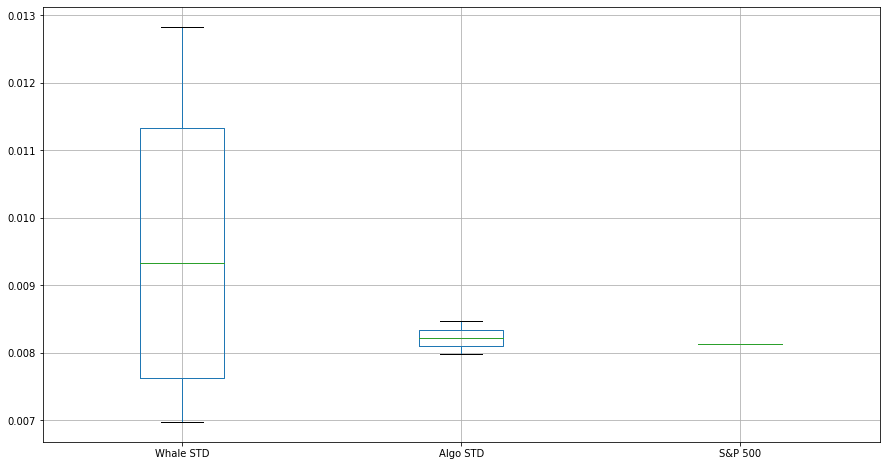

In [1040]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

portfolio_std = pd.DataFrame({
    "Whale STD": whale_daily_std,
    "Algo STD": algo_daily_std,
    "S&P 500": sp500_daily_std
})

portfolio_std.boxplot(figsize=(15,8))

In [1041]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE

whale_annualized_std = whale_daily_std * np.sqrt(252)
whale_annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

---

In [1042]:
algo_annualized_std = algo_daily_std * np.sqrt(252)
algo_annualized_std.head()


Algo 1    0.126801
Algo 2    0.134401
dtype: float64

In [1043]:
sp500_annualized_std = sp500_daily_std * np.sqrt(252)
sp500_annualized_std.head()

SP 500    0.129133
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

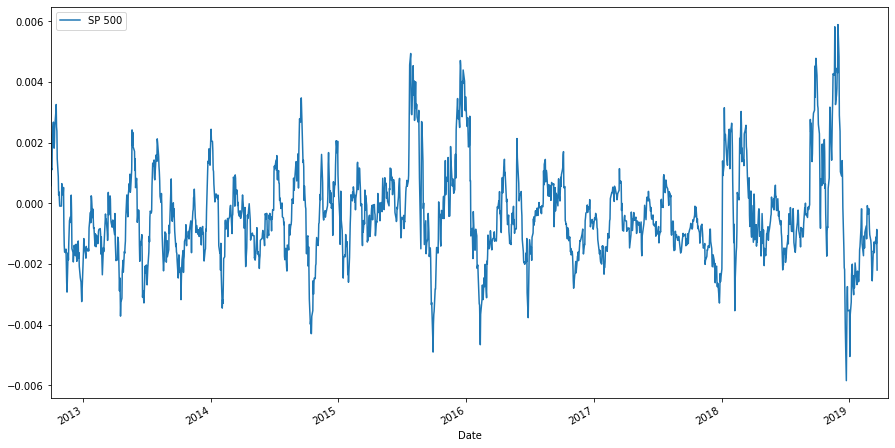

In [1044]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
sp500_ma21 = sp500_daily_returns_df.rolling(window=21).mean()

sp500_ma21.plot(figsize=(15,8))

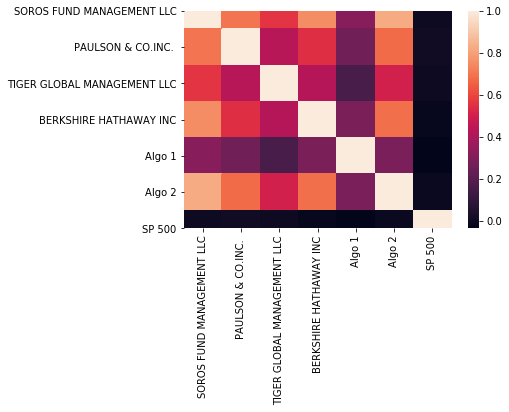

In [1045]:
# Correlation
# YOUR CODE HERE

correlation = combined_df.corr()
sns.heatmap(correlation)


In [1046]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE

In [1047]:
berkshire_covariance = whale_returns_df['BERKSHIRE HATHAWAY INC'].cov(sp500_daily_returns_df['SP 500'])

In [1048]:
variance = sp500_daily_returns_df['SP 500'].var()

In [1049]:
berkshire_beta = berkshire_covariance / variance

In [1050]:
berkshire_beta

-0.02322885203069926

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [1051]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [1052]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP 500                        -0.518582
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

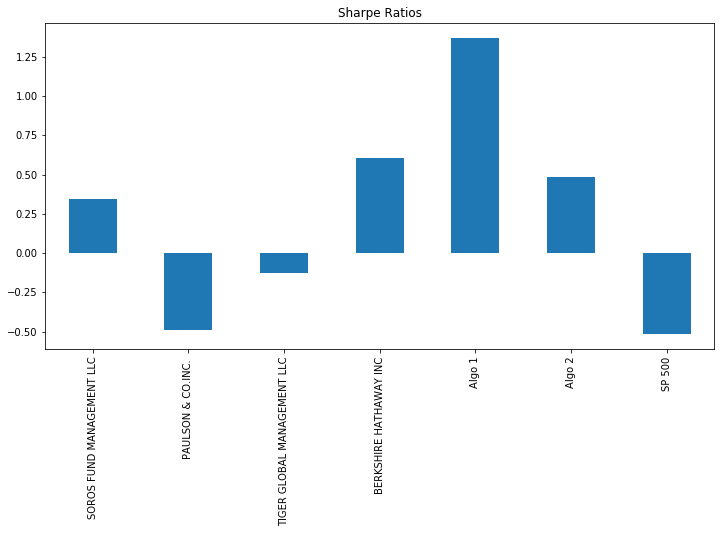

In [1053]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", figsize=(12,6))

---

In [1054]:
print("Algo 1 outperforms")

Algo 1 outperforms


# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [1055]:
# Read the first stock
# YOUR CODE HERE
visa_returns_csv = Path("visa_returns.csv")
visa_returns = pd.read_csv(visa_returns_csv,index_col="Date",parse_dates=True,infer_datetime_format=True)
visa_returns.head()

,Close
Date,
2017-01-03,79.50
2017-01-04,80.15
2017-01-05,81.09
2017-01-06,82.21
2017-01-09,81.75


In [1056]:
# Read the second stock
# YOUR CODE HERE
apple_returns_csv = Path("apple_returns.csv")
apple_returns = pd.read_csv(apple_returns_csv,index_col="Date",parse_dates=True,infer_datetime_format=True)
apple_returns.head()

,Close
Date,
2017-01-03,116.15
2017-01-04,116.02
2017-01-05,116.61
2017-01-06,117.91
2017-01-09,118.99


In [1057]:
# Read the third stock
# YOUR CODE HERE
kellog_returns_csv = Path("kellog_returns.csv")
kellog_returns = pd.read_csv(kellog_returns_csv,index_col="Date",parse_dates=True,infer_datetime_format=True)
kellog_returns.head()

,Close
Date,
2017-01-03,73.37
2017-01-04,73.18
2017-01-05,73.11
2017-01-06,73.13
2017-01-09,72.13


In [1058]:
visa_returns_df = pd.DataFrame(visa_returns)
visa_returns_df = visa_returns_df.rename(columns={"Close":"Visa Returns" })

apple_returns_df = pd.DataFrame(apple_returns)
apple_returns_df = apple_returns_df.rename(columns={"Close":"Apple Returns" })

kellog_returns_df = pd.DataFrame(kellog_returns)
kellog_returns_df = kellog_returns_df.rename(columns={"Close":"Kellog Returns" })


In [1059]:
#kellog_returns_df.dt.strftime('%Y/%m/%d')
apple_returns_df

,Apple Returns
Date,
2017-01-03,116.15
2017-01-04,116.02
2017-01-05,116.61
2017-01-06,117.91
2017-01-09,118.99
...,...
2019-12-23,284.00
2019-12-24,284.27
2019-12-26,289.91


In [1060]:
kellog_returns_df

,Kellog Returns
Date,
2017-01-03,73.37
2017-01-04,73.18
2017-01-05,73.11
2017-01-06,73.13
2017-01-09,72.13
...,...
2019-12-23,68.78
2019-12-24,68.93
2019-12-26,68.66


In [1061]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

mystock_df = pd.concat([visa_returns_df,kellog_returns_df,apple_returns_df],sort=True,axis =1,join="inner")



In [1062]:
mystock_df

,Visa Returns,Kellog Returns,Apple Returns
Date,,,
2017-01-03,79.50,73.37,116.15
2017-01-04,80.15,73.18,116.02
2017-01-05,81.09,73.11,116.61
2017-01-06,82.21,73.13,117.91
2017-01-09,81.75,72.13,118.99
...,...,...,...
2019-12-23,187.08,68.78,284.00
2019-12-24,187.57,68.93,284.27
2019-12-26,189.16,68.66,289.91


In [1063]:
# Reset the index
# YOUR CODE HERE
# mystock_df.reset_index()-Why do we need to do this?

In [1064]:
# Drop Nulls
# YOUR CODE HERE
mystock_df.isnull().sum()

Visa Returns      0
Kellog Returns    0
Apple Returns     0
dtype: int64

In [1065]:
mystock_df.describe()


,Visa Returns,Kellog Returns,Apple Returns
count,753.000000,753.000000,753.000000
mean,132.355126,65.149309,182.506521
std,30.523297,5.778354,34.221885
min,79.500000,52.090000,116.020000
25%,106.080000,61.180000,156.390000
50%,132.920000,65.380000,175.850000
75%,157.330000,70.020000,203.860000
max,189.390000,76.440000,291.520000


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [1066]:
mystock_returns_df = mystock_df.pct_change()


In [1067]:
mystock_returns_df.isnull().sum()

Visa Returns      1
Kellog Returns    1
Apple Returns     1
dtype: int64

In [1068]:
mystock_returns_df.dropna().inplace=True


In [1069]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
mystock_weighted_returns = mystock_returns_df.dot(weights)
mystock_weighted_returns.head()

Date
2017-01-03         NaN
2017-01-04    0.001489
2017-01-05    0.005286
2017-01-06    0.008411
2017-01-09   -0.003370
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [1070]:
# YOUR CODE HERE
combined_mystock_df = pd.concat([combined_df,mystock_returns_df ],sort=True,axis =1, join="inner")

In [1071]:
combined_mystock_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500,Visa Returns,Kellog Returns,Apple Returns
Date,,,,,,,,,,
2017-01-03,0.004301,0.015299,0.003969,0.008224,0.007381,0.009358,-0.005690,NaN,NaN,NaN
2017-01-04,0.011581,0.007029,-0.001011,0.012204,0.012510,0.014701,0.000771,0.008176,-0.002590,-0.001119
2017-01-05,0.003079,0.004107,-0.004264,0.016092,-0.003955,-0.001872,-0.003505,0.011728,-0.000957,0.005085
2017-01-06,0.003561,-0.013250,-0.001213,0.005667,-0.000364,0.000051,0.003561,0.013812,0.000274,0.011148
2017-01-09,-0.000458,0.002007,-0.004540,-0.002642,0.002775,-0.006277,0.000000,-0.005595,-0.013674,0.009160


In [1072]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
combined_mystock_df = combined_mystock_df.dropna()
combined_mystock_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500,Visa Returns,Kellog Returns,Apple Returns
Date,,,,,,,,,,
2017-01-04,0.011581,0.007029,-0.001011,0.012204,0.012510,0.014701,0.000771,0.008176,-0.002590,-0.001119
2017-01-05,0.003079,0.004107,-0.004264,0.016092,-0.003955,-0.001872,-0.003505,0.011728,-0.000957,0.005085
2017-01-06,0.003561,-0.013250,-0.001213,0.005667,-0.000364,0.000051,0.003561,0.013812,0.000274,0.011148
2017-01-09,-0.000458,0.002007,-0.004540,-0.002642,0.002775,-0.006277,0.000000,-0.005595,-0.013674,0.009160
2017-01-10,-0.001490,0.000394,-0.000718,0.010586,0.007669,0.006618,-0.002822,-0.005382,-0.006516,0.001008
...,...,...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.005011,0.013549,0.001810
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,-0.001309,0.000686,0.000100
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.001311,-0.005138,0.019473


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

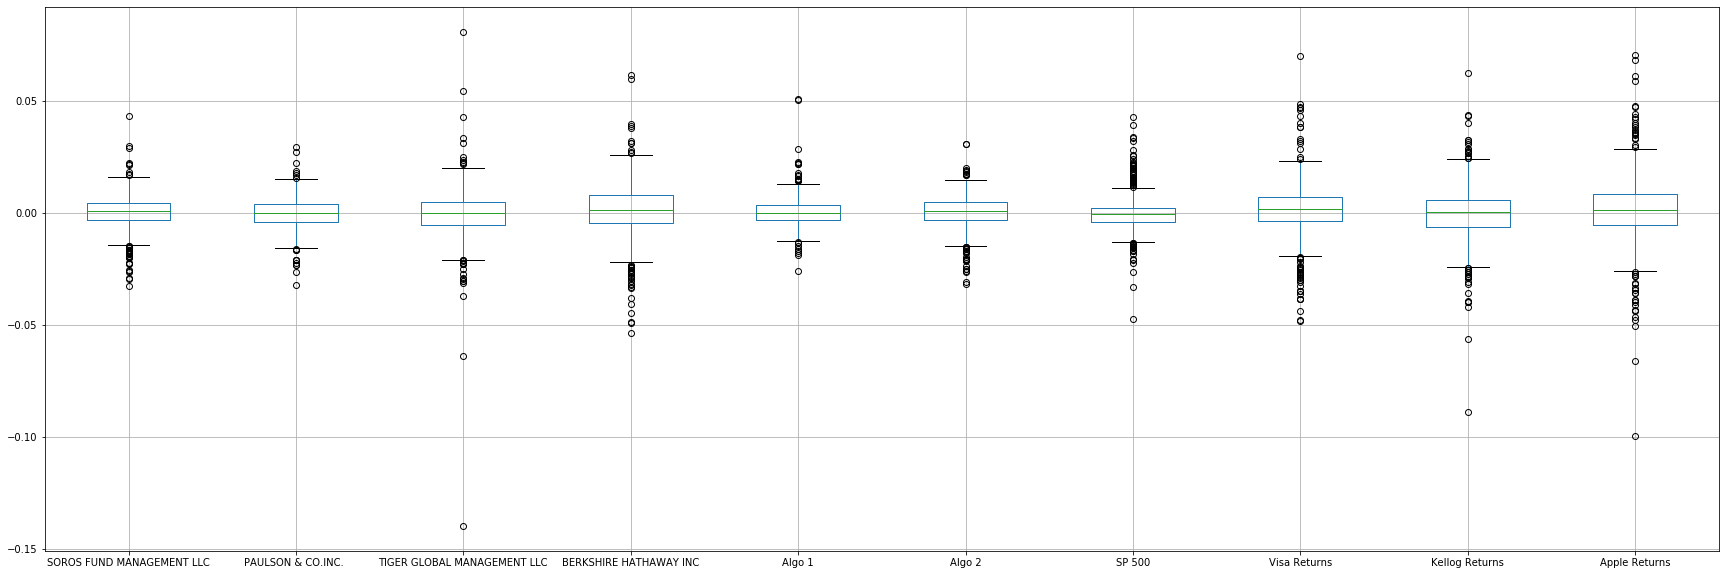

In [1073]:
# Risk
# YOUR CODE HERE
combined_mystock_df.boxplot(figsize=(30,10))


In [1074]:
combined_mystock_std = combined_mystock_df.std()
combined_mystock_std

SOROS FUND MANAGEMENT LLC      0.007863
PAULSON & CO.INC.              0.006791
TIGER GLOBAL MANAGEMENT LLC    0.011890
BERKSHIRE HATHAWAY INC         0.012496
Algo 1                         0.006724
Algo 2                         0.007567
SP 500                         0.008176
Visa Returns                   0.012458
Kellog Returns                 0.012981
Apple Returns                  0.015608
dtype: float64

In [1075]:
combined_mystock_annualized_std = combined_mystock_std * np.sqrt(252)
combined_mystock_annualized_std.head(10)

SOROS FUND MANAGEMENT LLC      0.124821
PAULSON & CO.INC.              0.107798
TIGER GLOBAL MANAGEMENT LLC    0.188752
BERKSHIRE HATHAWAY INC         0.198374
Algo 1                         0.106747
Algo 2                         0.120116
SP 500                         0.129789
Visa Returns                   0.197767
Kellog Returns                 0.206069
Apple Returns                  0.247776
dtype: float64

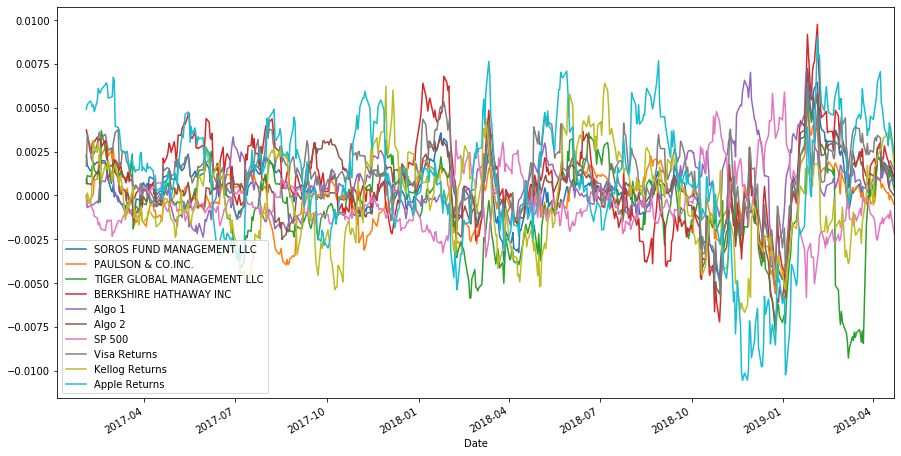

In [1076]:
# Rolling #21 Day
# YOUR CODE HERE

combined_mystock_df_ma21 = combined_mystock_df.rolling(window=21).mean()

combined_mystock_df_ma21.plot(figsize=(15,8))

In [1077]:
# Beta
# YOUR CODE HERE

visa_covariance = mystock_returns_df['Visa Returns'].cov(sp500_daily_returns_df['SP 500'])

In [1078]:
variance = sp500_daily_returns_df['SP 500'].var()

In [1079]:
visa_beta = visa_covariance / variance

In [1080]:
visa_beta

0.04567662973456045

In [1081]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

combined_mystock_sharpe_ratios = (combined_mystock_df.mean() * 252) / (combined_mystock_df.std() * np.sqrt(252))

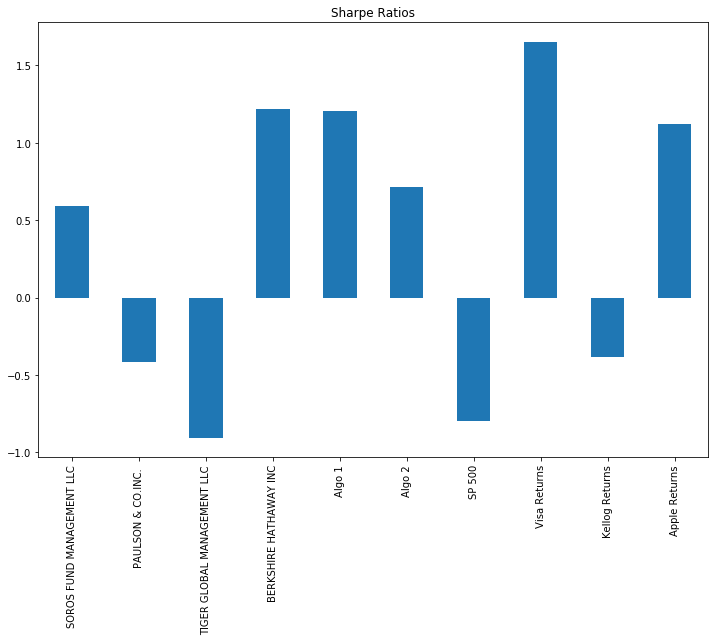

In [1082]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
combined_mystock_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", figsize=(12,8))

## Include correlation analysis to determine which stocks (if any) are correlated

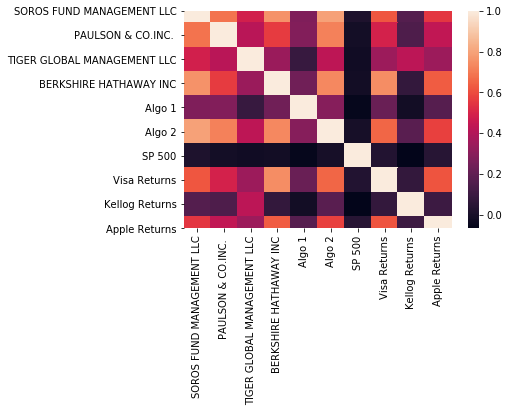

In [1083]:
# YOUR CODE HERE

combined_mystock_correlation = combined_mystock_df.corr()
sns.heatmap(combined_mystock_correlation)